In [1]:
import sys; sys.path.insert(0, '..')

import os
import time
import shutil
import contextlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from models.helper import *
from models.models import *
from solvers.euler import *
from solvers.rk_solvers import *

from IPython.utils import io
from data_generator import *

print(f"Your machine has {os.cpu_count()} cores.")

Your machine has 8 cores.


This is used to generate data from the models (stored in `models.py`). You can speed up the generation process by increasing the `cores` argument to take advantage of `multiprocessing`. The following context manager is taken from [StackOverflow](https://stackoverflow.com/questions/8391411/how-to-block-calls-to-print#:~:text=If%20you%20don%27t%20want,the%20top%20of%20the%20file.) to prevent printing but it does not work, as the printing comes from functions in other files

In [2]:
start = time.time()
with io.capture_output() as captured:
    total = generateData(model4,
            num_data = 1,
            init_sty = 'random',
            times = (0, 20),
            params = {'no. of prey': 100, 
        'kappa for prey': 0.5, 
        'attraction of prey a': 0, 
        'repulsion of prey b_1': 0.15, 
        'repulsion of pred b_2': 0.55,
        'p1 spotted': 0.8,
        'p2 not spotted':0.4,
        'angle_prey': np.cos(np.pi / 3),
        'angle_pred': np.cos(np.pi / 2.5), 
        'num_neighbours': 5,
        'attraction of pred c': 10, 
        'exponent of dist pred p': 3},
            steps = 1000,
            second_order = False,
            method = 'rk2',
            return_vel = False,
            cores = 8)
end = time.time()
print(f"Time taken: {end-start} seconds.")

Time taken: 3.19498610496521 seconds.


Check the output

In [3]:
total = list(total)

In [4]:
total[0][1].shape

(1000, 201, 2)

You are using just the positions.


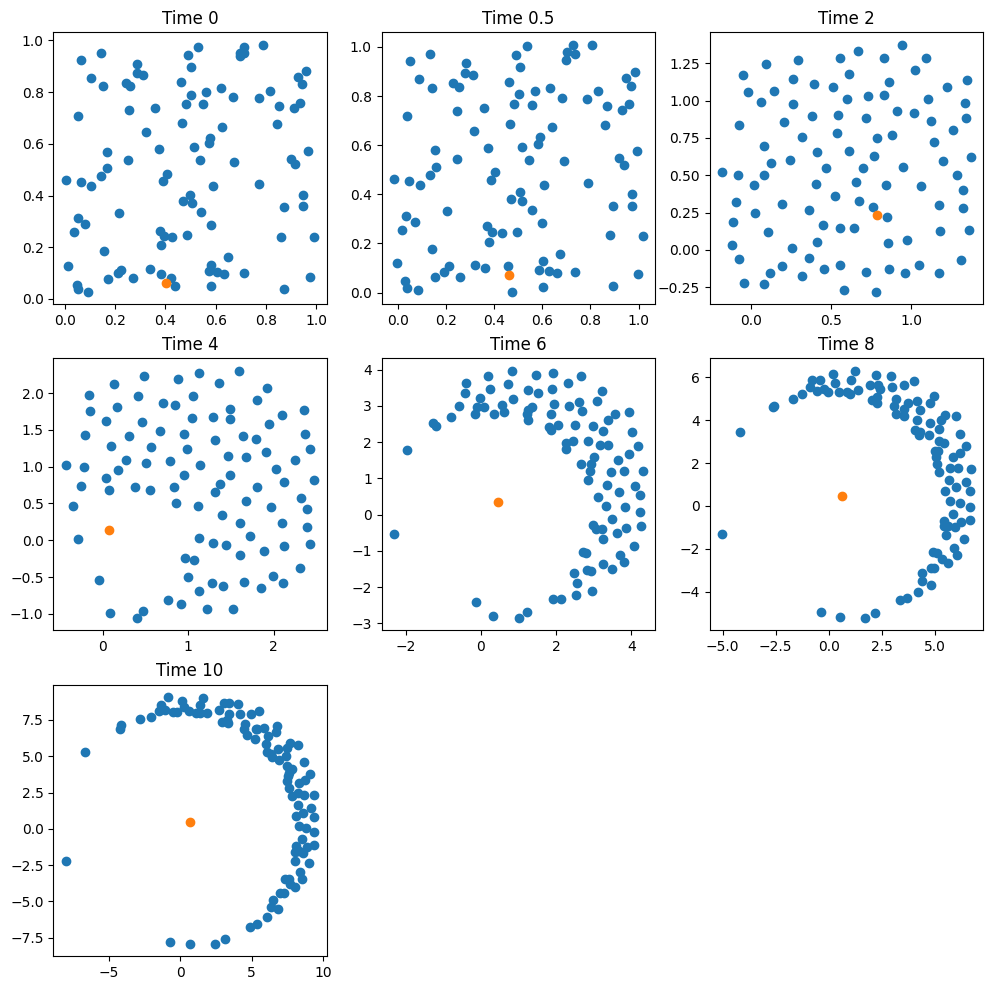

In [5]:
multiPlot([total[0][1], 20/1000, 100], sample_points =[0,0.5,2,4,6,8,10],
            axis_lim = None, second_order = False, quiver=True)

The next steps are to create datasets from those objects. 

In [6]:
# trying a simpler model and only 10 prey
N = 100

start = time.time()

total = generateData(model1,
        num_data = 1,
        init_sty = 'random',
        times = (0, 20),
        params = {'no. of prey': N, 
    'kappa for prey': 0.5, 
    'attraction of prey a': 1, 
    'repulsion of prey b_1': 1, 
    'repulsion of pred b_2': 0.07, 
    'attraction of pred c': 10, 
    'exponent of dist pred p': 1.2},
        steps = 1000,
        second_order = False,
        method = 'rk2',
        return_vel = False,
        cores = 1,
        flattened=False)
end = time.time()
print(f"Time taken: {end-start} seconds.")

Trying to use multiprocessing...
Multiprocessing successful.
Time taken: 2.3579039573669434 seconds.


You are using just the positions.


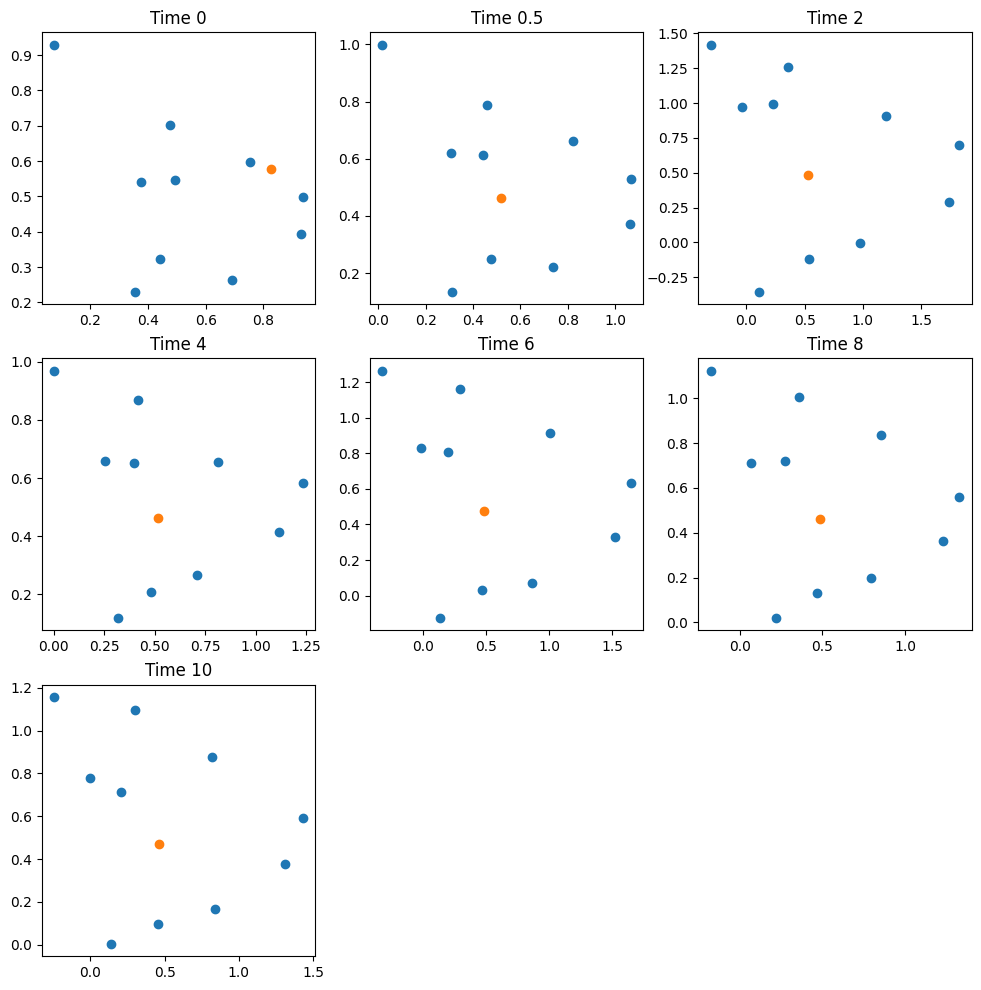

In [7]:
multiPlot([total[0][1], 20/1000, 10], sample_points =[0,0.5,2,4,6,8,10],
            axis_lim = None, second_order = False, quiver=True)

We only get the `y` components, which are the trajectories over the range of time discretized according to the number of time steps chosen

In [8]:
total[0][1].shape

(1000, 201, 2)

In [10]:
from NeuralNetworks.preprocess import *
train_ds, valid_ds, test_ds = getDatasets(total[0][1], scaling = False, shuffle=True)

(800, 201, 2) (100, 201, 2) (100, 201, 2)
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-09-15 15:10:08.523268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-15 15:10:08.523448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
